### Importings

In [8]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix 

import warnings
warnings.filterwarnings("ignore")


2025-04-22 09:30:20.680972: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-22 09:30:20.688966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745314220.698100   84271 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745314220.700772   84271 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-22 09:30:20.710362: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# data preprocessing


### Train image preproccesssing

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/home/aissata/Downloads/ICRISAT/groundnut-leaf-diseases/image_plant/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1204 files belonging to 5 classes.


2025-04-22 09:30:24.258833: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Validation image preproccessing

In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/home/aissata/Downloads/ICRISAT/groundnut-leaf-diseases/image_plant/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 344 files belonging to 5 classes.


### Test image preprocessing

In [12]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/home/aissata/Downloads/ICRISAT/groundnut-leaf-diseases/image_plant/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 172 files belonging to 5 classes.


In [13]:
print(test_set)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>


## Model building and Compilation

In [14]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=224,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=224,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=5,activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy']
    )

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 111, 111, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 54, 54, 224)    │       129,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 224)    │       451,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 224)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 256)    │       516,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    19,201,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         7,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,502,029 (93.47 MB)

 Trainable params: 24,502,029 (93.47 MB)

 Non-trainable params: 0 (0.00 B)

## Model training

In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.3211 - loss: 2.0359 - val_accuracy: 0.4331 - val_loss: 1.2471
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.4666 - loss: 1.2010 - val_accuracy: 0.5494 - val_loss: 1.0311
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - accuracy: 0.5973 - loss: 0.9848 - val_accuracy: 0.6076 - val_loss: 0.8806
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 168s 4s/step - accuracy: 0.6999 - loss: 0.7697 - val_accuracy: 0.6163 - val_loss: 0.9594
Epoch 5/50
31/38 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.7708 - loss: 0.6035

## Model evaluation

In [15]:
# model Evaluation on test set
test_loss, test_acc = model.evaluate(test_set)
print(test_loss, test_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 796ms/step - accuracy: 0.2727 - loss: 1.4418
1.4660857915878296 0.302325576543808


## Saving Model

In [10]:
model.save("trained_model_1st_draft.h5")

In [11]:
training_history.history

{'accuracy': [0.3961794078350067,
  0.514950156211853,
  0.6578072905540466,
  0.7009966969490051,
  0.7715947031974792,
  0.789867103099823,
  0.8712624311447144,
  0.9186046719551086,
  0.9078072905540466,
  0.9393687844276428,
  0.9676079750061035,
  0.960132896900177,
  0.9800664186477661,
  0.9684385657310486,
  0.974252462387085,
  0.9709302186965942,
  0.9900332093238831,
  0.9883720874786377,
  0.9759136438369751,
  0.9725913405418396,
  0.9925249218940735,
  0.9858803749084473,
  0.9817276000976562,
  0.9833887219429016,
  0.9933554530143738,
  0.9933554530143738,
  0.9975082874298096,
  0.9991694092750549,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9991694092750549,
  0.9883720874786377,
  0.9817276000976562,
  0.9717608094215393,
  0.9709302186965942,
  0.9800664186477661,
  0.9916943311691284,
  0.9983388781547546,
  0.9983388781547546,
  0.9883720874786377,
  0.9975082874298096,
  0.9991694092750549,
  0.9958471655845642,
  0.9983388781547546,
  1.0,
  1.0,
  1.0],
 'loss': [1

In [12]:
# Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [13]:
training_history.history['accuracy']

[0.3463455140590668,
 0.472591370344162,
 0.5863787531852722,
 0.684385359287262,
 0.735049843788147,
 0.7906976938247681,
 0.8164451718330383,
 0.8637873530387878,
 0.9177740812301636,
 0.9078072905540466,
 0.9227574467658997,
 0.9443521499633789,
 0.9667773842811584,
 0.9684385657310486,
 0.9858803749084473,
 0.9784052968025208,
 0.9734219312667847,
 0.97508305311203,
 0.9858803749084473,
 0.9950166344642639,
 0.9825581312179565,
 0.9892026782035828,
 0.9825581312179565,
 0.9900332093238831,
 0.9916943311691284,
 0.9941860437393188,
 0.9950166344642639,
 0.9817276000976562,
 0.9941860437393188,
 0.9925249218940735,
 0.9991694092750549,
 0.9941860437393188,
 0.9875415563583374,
 0.9950166344642639,
 0.9933554530143738,
 0.9991694092750549,
 0.9983388781547546,
 0.9941860437393188,
 0.9842192530632019,
 0.9767441749572754,
 0.9833887219429016,
 0.9991694092750549,
 0.9991694092750549,
 0.9941860437393188,
 0.9975082874298096,
 1.0,
 1.0,
 0.9983388781547546,
 0.9991694092750549,
 0.999

# Accuracy visualization

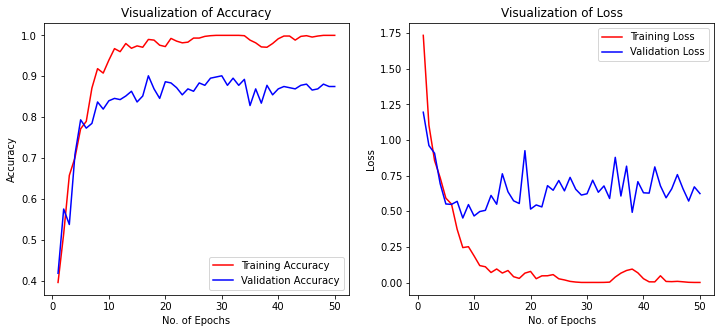

In [13]:
import matplotlib.pyplot as plt

# Génération des epochs
epochs = [i for i in range(1, 51)]

# Création de la figure
plt.figure(figsize=(12, 5))

# Tracé de l'accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy")
plt.legend()

# Tracé de la loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss")
plt.legend()

# Sauvegarde des graphiques
plt.savefig("training_results.png")

# Affichage des graphiques
plt.show()


## Other evaluation metrics

In [7]:
class_name = test_set.class_names
class_name

NameError: name 'test_set' is not defined

In [41]:
y_pred = model.predict(test_set)
Y_pred = tf.argmax(y_pred, axis=1)
Y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


<tf.Tensor: shape=(172,), dtype=int64, numpy=
array([1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 2, 4, 4, 4, 4, 4, 3, 4])>

In [42]:
true_categories = tf.concat([y for _, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

2025-04-15 14:36:43.873652: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(172,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])>

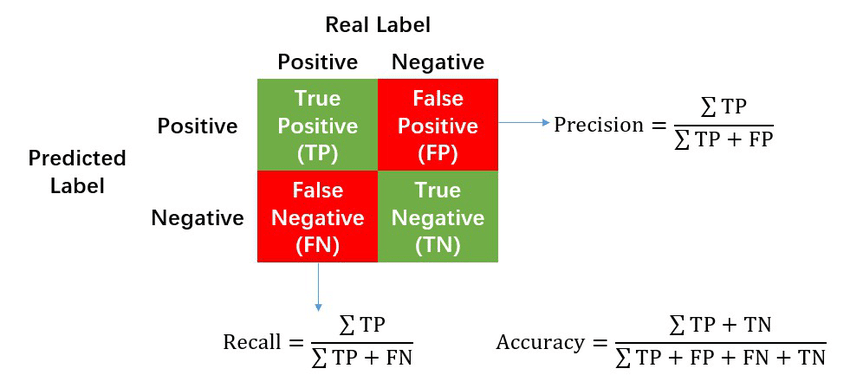

In [43]:
print(classification_report(Y_true,Y_pred,target_names=class_name))

                            precision    recall  f1-score   support

      ALTERNARIA LEAF SPOT       0.93      0.82      0.87        45
                   HEALTHY       0.89      0.98      0.94        60
LEAF SPOT (EARLY AND LATE)       0.83      0.76      0.79        45
                   ROSETTE       0.67      1.00      0.80        10
                      RUST       0.80      0.67      0.73        12

                  accuracy                           0.86       172
                 macro avg       0.82      0.85      0.83       172
              weighted avg       0.87      0.86      0.86       172



In [44]:
cm = confusion_matrix(Y_true, Y_pred) 
cm.shape

(5, 5)

## Confusion Matrix visualisation

In [5]:
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix 


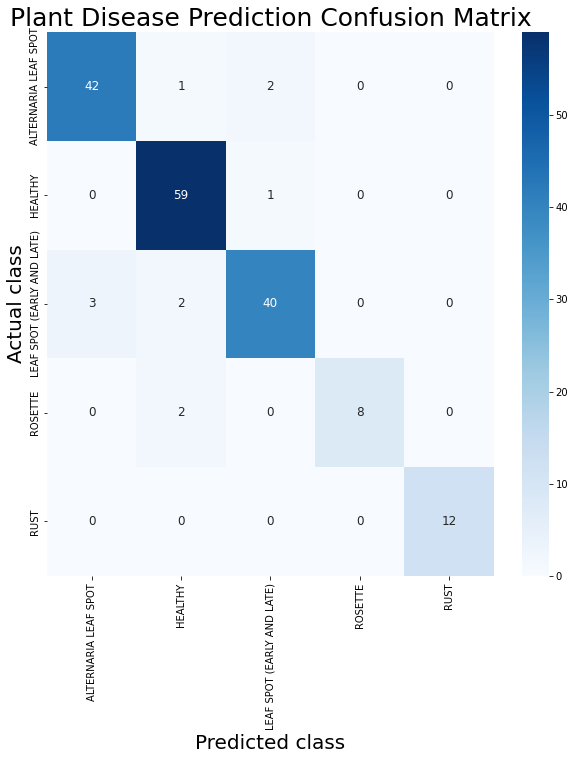

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Noms des classes
class_names = [
    "ALTERNARIA LEAF SPOT",
    "HEALTHY",
    "LEAF SPOT (EARLY AND LATE)",
    "ROSETTE",
    "RUST"
]


plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names, 
            annot_kws={"size": 12})
plt.xlabel("Predicted class", fontsize=20)
plt.ylabel("Actual class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)

# 👉 Enregistrement du graphique
plt.savefig("confusion_matrix cnn.png", bbox_inches='tight')  # tu peux changer le nom et le format si tu veux



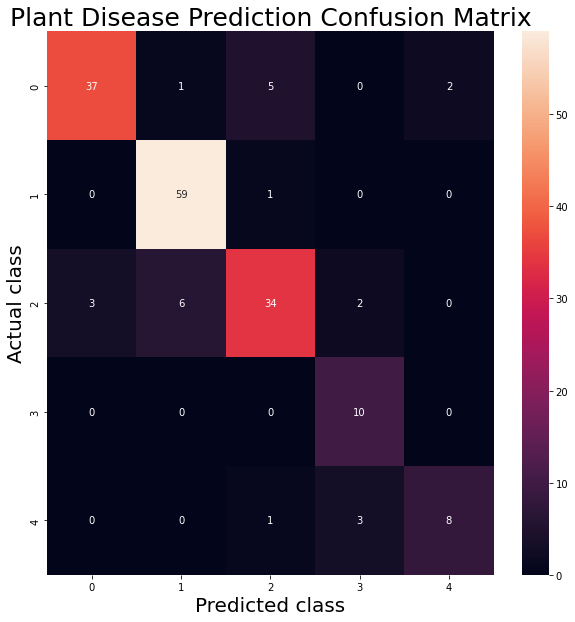

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, annot_kws={"size":10})
plt.xlabel("Predicted class", fontsize=20)
plt.ylabel("Actual class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)

# 👉 Enregistrement du graphique
plt.savefig("confusion_matrix.png", bbox_inches='tight')  # tu peux changer le nom et le format si tu veux

plt.show()


In [ ]:
###################################################################################################################

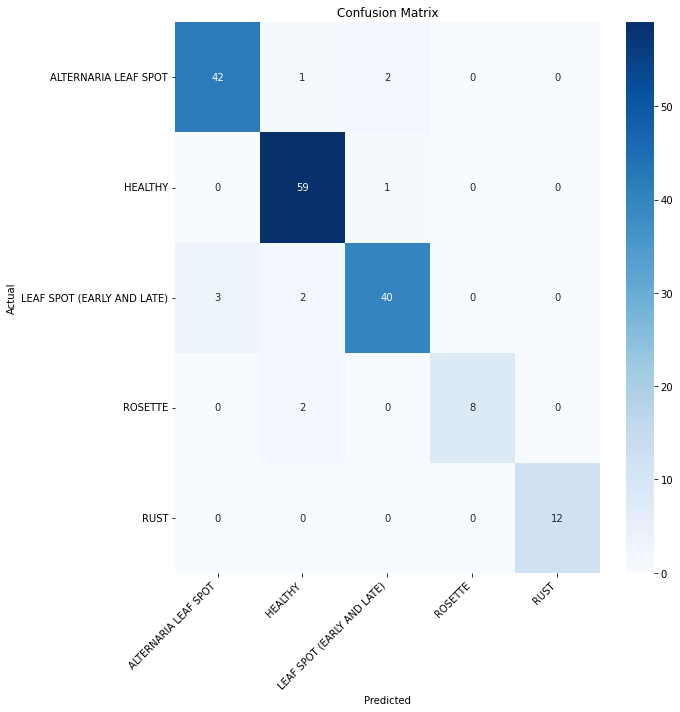

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define class names
class_names = [
    "ALTERNARIA LEAF SPOT",
    "HEALTHY",
    "LEAF SPOT (EARLY AND LATE)",
    "ROSETTE",
    "RUST"
]

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save the figure
plt.savefig("confusion_matrixcnn.png", dpi=300)  # You can change the path and dpi as needed
plt.show()
